In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

path = "coalbumps.csv"
data = pd.read_csv(path)
data = data.sample(frac=1)
#data = data.drop(['Formation','Well Name'], axis = 1)
data.head()
data.shape

(2584, 19)

In [2]:
train_sizes = list(range(100,3800,100))



In [3]:
categorical = ["SeismicHazard", "SeismoacousticHazard", "SeismicHazardAssessment", "ShiftType"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass


In [4]:
def tv_scores_mean(estimator, X, y, train_sizes, scoring='accuracy', shuffle=True, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X=X, y=y, 
                                                                  train_sizes=train_sizes, scoring=scoring, 
                                                                  shuffle=shuffle, cv=cv)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    return train_sizes, train_scores_mean, validation_scores_mean

In [5]:
from sklearn.model_selection import learning_curve
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler

target = 'CurrentShiftHazard'
features = [feature for feature in list(data.head(0)) if feature != target]

ros = RandomOverSampler()
X, y = ros.fit_sample(data[features], data[target])

y.shape


(4828,)

In [6]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = tree.DecisionTreeClassifier(max_depth=10), X=X,
                                                             y=y, train_sizes=train_sizes, cv=5, scoring='f1', shuffle=True)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)


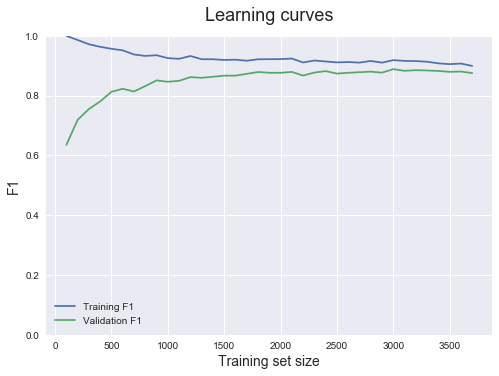

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')


def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training F1')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation F1')
    plt.ylabel('F1', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean)

[0.7257704  0.72501069 0.75246135 0.78385614 0.81283278 0.84676728
 0.86122378 0.88628159 0.89493729 0.91179694 0.9224108  0.93478356
 0.942119   0.94679172 0.95574653 0.95755754 0.96061603 0.96118157]
[0.72871218 0.73323762 0.76458778 0.80167909 0.83284031 0.87062674
 0.88400684 0.91228204 0.92526222 0.94581038 0.95695095 0.97139446
 0.97950123 0.98718795 0.99268797 0.9943386  0.99701204 0.99721678]
{'mean_fit_time': array([0.00433318, 0.00432181, 0.00498676, 0.0059677 , 0.0043323 ,
       0.0076286 , 0.00764553, 0.00831016, 0.00864267, 0.0089759 ,
       0.00504891, 0.01041452, 0.0156215 , 0.00631603, 0.00963593,
       0.01030437, 0.01031995, 0.01032384]), 'std_fit_time': array([4.69395155e-04, 4.51442458e-04, 1.40377058e-06, 1.74652345e-05,
       3.09150586e-03, 4.78730667e-04, 4.69965469e-04, 4.70808758e-04,
       4.70190252e-04, 8.14685514e-04, 3.74924786e-03, 7.36417838e-03,
       2.24783192e-07, 4.48461624e-03, 4.77945510e-04, 4.68897779e-04,
       4.73728417e-04, 4.7903829

C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


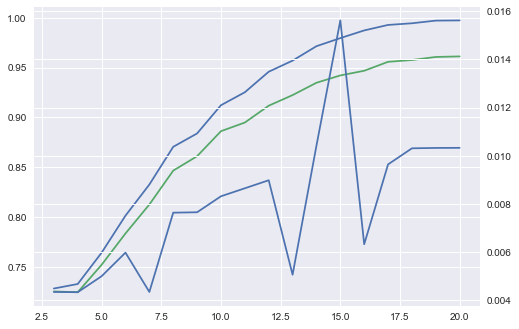

In [39]:
from sklearn import svm, model_selection


param_grid = {'max_depth' : range(3,21,1)}

gridsearch = model_selection.GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid = param_grid, scoring='f1')

gridsearch.fit(X,y)


print(gridsearch.cv_results_['mean_test_score'])
print(gridsearch.cv_results_['mean_train_score'])
print(gridsearch.cv_results_)

def plot_complexity_curve(hyperparameter_values, time_complexity, train_scores_mean, validation_scores_mean):
    """
    https://matplotlib.org/examples/api/two_scales.html
    """
    fig, ax1 = plt.subplots()
    ax1.plot(hyperparameter_values, train_scores_mean, label = 'Training F1')
    ax1.plot(hyperparameter_values, validation_scores_mean, label = 'Validation F1')
    ax2 = ax1.twinx()
    ax2.plot(hyperparameter_values, time_complexity, label = 'Time Complexity')
    #ax1.set_ylabel('F1', fontsize = 14)
    #.xlabel('Hyperparameter Value', fontsize = 14)
    #plt.title('Model Complexity Curve', fontsize = 18, y = 1.03)
    #plt.legend()
    #x1.ylim(0,1)

plot_complexity_curve(param_grid['max_depth'], gridsearch.cv_results_['mean_fit_time'], gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'])

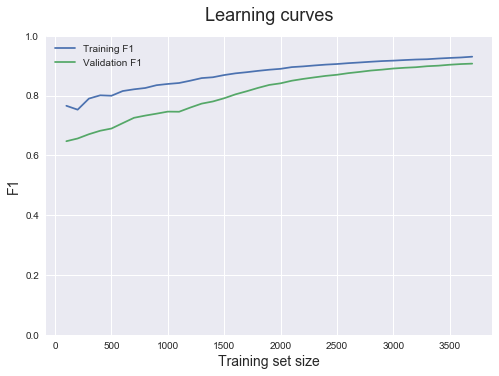

In [36]:
import sklearn

knn_est = sklearn.neighbors.KNeighborsClassifier()


plot_learning_curve(*tv_scores_mean(knn_est,X,y,train_sizes))

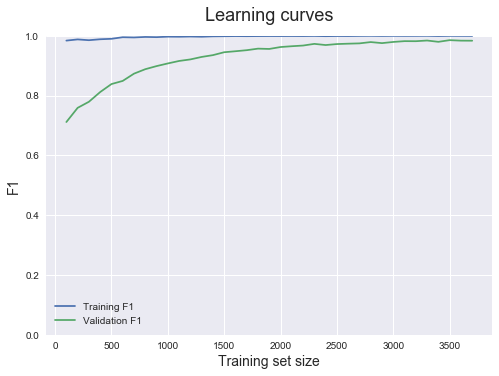

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc_est = RandomForestClassifier()

plot_learning_curve(*tv_scores_mean(rfc_est,X,y,train_sizes))

C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


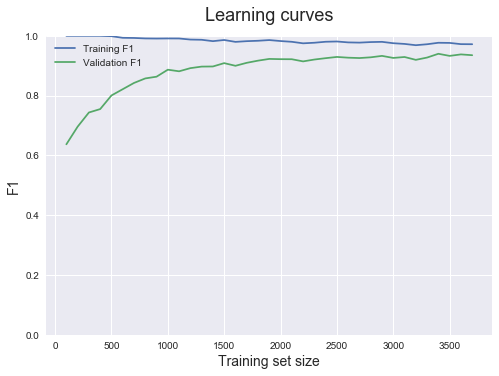

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


X_scale=X

scaler = StandardScaler()
scaler.fit(X_scale)

X_scale = scaler.transform(X_scale)


mlp_est = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,30), random_state=1)


plot_learning_curve(*tv_scores_mean(mlp_est,X_scale,y,train_sizes))

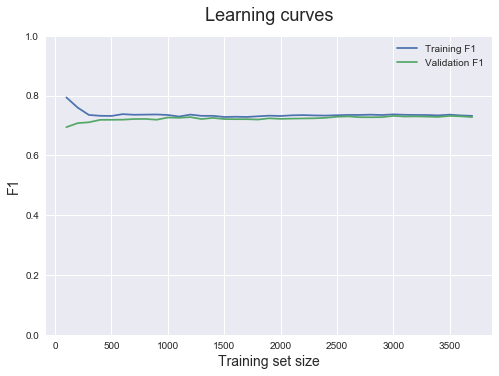

In [11]:
from sklearn import svm

svm_est = svm.SVC(kernel='linear', C=1, gamma=1)

plot_learning_curve(*tv_scores_mean(svm_est,X_scale,y,train_sizes))